###### Null Hypothesis: There is no signficant changes in MPG in relation to the vehicle weight
###### Alternate: MPG increases/decreses by weight of vehicle (two tail)

In [6]:
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations 
import seaborn as sns
import statsmodels

In [7]:
# Assuming you have already loaded the data using pd.read_csv
cars = pd.read_csv(r'data/car_data.csv')

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Set the display width option to a large value
pd.set_option('display.width', 1000)

# Print the DataFrame to see all columns
print(cars)

      mpg  cylinders  displacement horsepower  weight  acceleration  model  origin                   car_name
0    18.0          8         307.0      130.0  3504.0          12.0     70       1  chevrolet chevelle malibu
1    15.0          8         350.0      165.0  3693.0          11.5     70       1          buick skylark 320
2    18.0          8         318.0      150.0  3436.0          11.0     70       1         plymouth satellite
3    16.0          8         304.0      150.0  3433.0          12.0     70       1              amc rebel sst
4    17.0          8         302.0      140.0  3449.0          10.5     70       1                ford torino
..    ...        ...           ...        ...     ...           ...    ...     ...                        ...
393  27.0          4         140.0      86.00  2790.0          15.6     82       1            ford mustang gl
394  44.0          4          97.0      52.00  2130.0          24.6     82       2                  vw pickup
395  32.0 

In [8]:
correlation = cars['weight'].corr(cars['mpg'])
print("Correlation between 'weight' and 'mpg':", correlation)

Correlation between 'weight' and 'mpg': -0.8317409332443346


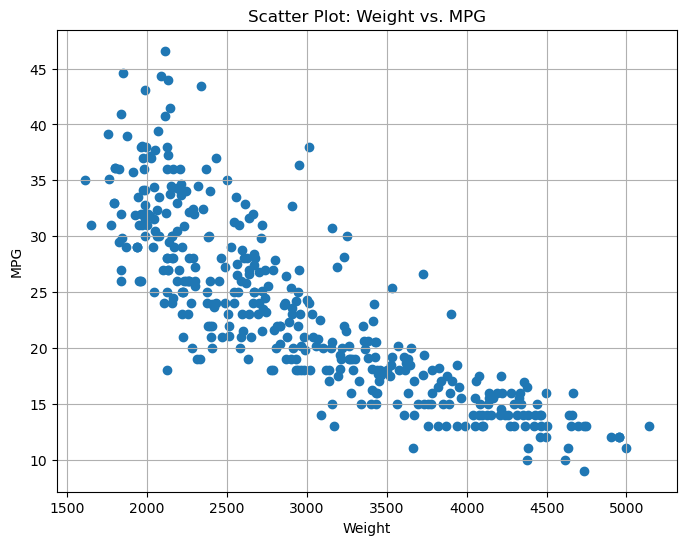

In [9]:
# Create a scatter plot for 'weight' vs. 'mpg'
plt.figure(figsize=(8, 6))
plt.scatter(cars['weight'], cars['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot: Weight vs. MPG')
plt.grid(True)
plt.show()

In [10]:
alpha = 0.05

In [19]:
# Independent t-test
# Used two different samples (mpg, weight)
t = stats.ttest_ind(cars['mpg'], cars['weight'],
    equal_var=False, # Welch's
    alternative='two-sided')
# print(t)

p_value = t[1]
print(p_value)


3.6317583378490467e-224


In [21]:
mpg_values = cars['mpg'].tolist()
weight_values = cars['weight'].tolist()
print(mpg_values)

[18.0, 15.0, 18.0, 16.0, 17.0, 15.0, 14.0, 14.0, 14.0, 15.0, 15.0, 14.0, 15.0, 14.0, 24.0, 22.0, 18.0, 21.0, 27.0, 26.0, 25.0, 24.0, 25.0, 26.0, 21.0, 10.0, 10.0, 11.0, 9.0, 27.0, 28.0, 25.0, 25.0, 19.0, 16.0, 17.0, 19.0, 18.0, 14.0, 14.0, 14.0, 14.0, 12.0, 13.0, 13.0, 18.0, 22.0, 19.0, 18.0, 23.0, 28.0, 30.0, 30.0, 31.0, 35.0, 27.0, 26.0, 24.0, 25.0, 23.0, 20.0, 21.0, 13.0, 14.0, 15.0, 14.0, 17.0, 11.0, 13.0, 12.0, 13.0, 19.0, 15.0, 13.0, 13.0, 14.0, 18.0, 22.0, 21.0, 26.0, 22.0, 28.0, 23.0, 28.0, 27.0, 13.0, 14.0, 13.0, 14.0, 15.0, 12.0, 13.0, 13.0, 14.0, 13.0, 12.0, 13.0, 18.0, 16.0, 18.0, 18.0, 23.0, 26.0, 11.0, 12.0, 13.0, 12.0, 18.0, 20.0, 21.0, 22.0, 18.0, 19.0, 21.0, 26.0, 15.0, 16.0, 29.0, 24.0, 20.0, 19.0, 15.0, 24.0, 20.0, 11.0, 20.0, 21.0, 19.0, 15.0, 31.0, 26.0, 32.0, 25.0, 16.0, 16.0, 18.0, 16.0, 13.0, 14.0, 14.0, 14.0, 29.0, 26.0, 26.0, 31.0, 32.0, 28.0, 24.0, 26.0, 24.0, 26.0, 31.0, 19.0, 18.0, 15.0, 15.0, 16.0, 15.0, 16.0, 14.0, 17.0, 16.0, 15.0, 18.0, 21.0, 20.0, 13.0

In [20]:
# Compare p value to alpha
if p_value > alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")
    
     

We reject the null hypothesis


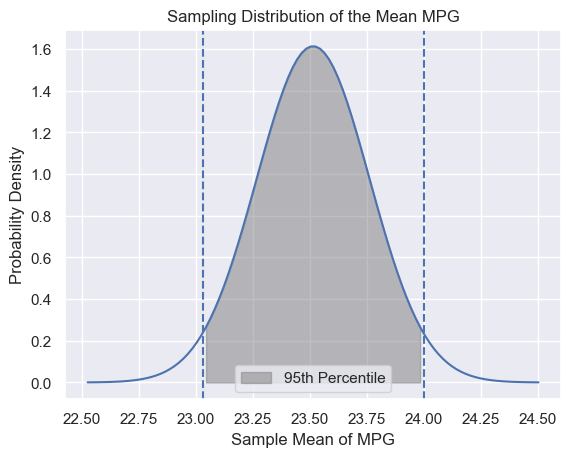

In [36]:
population_mean = cars['mpg'].mean() # caculates the mean of population
population_std = cars['mpg'].std() # caculates standard deviation
# Define the parameters for the alternate hypothesis
sample_size = 1000  # Size of the sample
standard_error = population_std / np.sqrt(sample_size)  # Standard error
# creates random variable
sampling_distribution_null = stats.norm(population_mean, 
                                        population_std / np.sqrt(sample_size))
# rv_alt = norm(loc=sample_mean_alt, scale=standard_error_alt)

x = np.linspace(population_mean - 4 * (population_std / np.sqrt(sample_size)), 
                population_mean + 4 * population_std / np.sqrt(sample_size), 100)

percentile_95 = sampling_distribution_null.ppf(0.975)
percentile_5 = sampling_distribution_null.ppf(0.025)
sns.set_theme()
plt.plot(x, sampling_distribution_null.pdf(x))
plt.axvline(percentile_95, linestyle="--")
plt.axvline(percentile_5, linestyle="--")

# This code shades the area that is between the 95th percentile
plt.fill_between(x, sampling_distribution_null.pdf(x), where=(x <= percentile_95) & (x >= percentile_5) , color='gray', alpha=0.5, label="95th Percentile") 
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend()
plt.show()

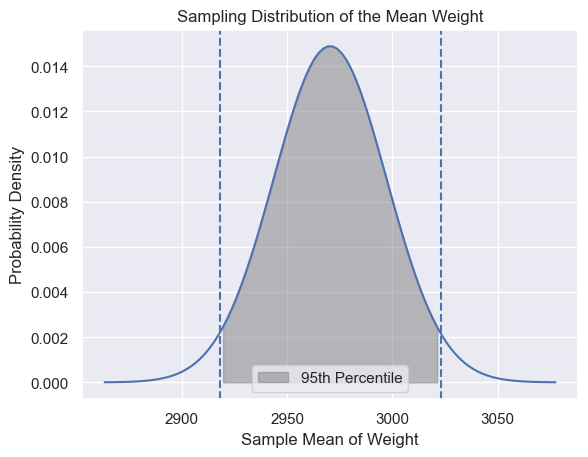

In [37]:
population_mean = cars['weight'].mean() # caculates the mean of population
population_std = cars['weight'].std() # caculates standard deviation
# Define the parameters for the alternate hypothesis
sample_size = 1000  # Size of the sample
standard_error = population_std / np.sqrt(sample_size)  # Standard error
# creates random variable
sampling_distribution_null = stats.norm(population_mean, 
                                        population_std / np.sqrt(sample_size))
# rv_alt = norm(loc=sample_mean_alt, scale=standard_error_alt)

x = np.linspace(population_mean - 4 * (population_std / np.sqrt(sample_size)), 
                population_mean + 4 * population_std / np.sqrt(sample_size), 100)

percentile_95 = sampling_distribution_null.ppf(0.975)
percentile_5 = sampling_distribution_null.ppf(0.025)
sns.set_theme()
plt.plot(x, sampling_distribution_null.pdf(x))
plt.axvline(percentile_95, linestyle="--")
plt.axvline(percentile_5, linestyle="--")

# This code shades the area that is between the 95th percentile
plt.fill_between(x, sampling_distribution_null.pdf(x), where=(x <= percentile_95) & (x >= percentile_5) , color='gray', alpha=0.5, label="95th Percentile") 
plt.xlabel('Sample Mean of Weight (lbs)')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean Weight')
plt.legend()
plt.show()